
# Script for Running Cellpose3 "cyto3" Model in Google Colab

This script runs the super-generalist "cyto3" model from Cellpose3.  
It is designed for cell segmentation in bright field microscopy imagaes images of Sf9 cells exposed to *Bacillus thuringiensis* insecticidal protein.

## Overview:
- Designed for use in Google Colab with GPU support.
- Mount your Google Drive to access and save segmentation results.

## Dependencies:
- Cellpose3 model (super-generalist "cyto3" model)
- Colab with GPU enabled
- Python libraries: `cellpose`, `torch` (installation is handled automatically in Colab).

## Credits:
This script is based on the Cellpose3 model from MouseLand [GitHub Repository](https://github.com/MouseLand/cellpose).  
Credits for the model go to the original authors.  
Script created by Adan Guerrero (adan.guerrero@ibt.unam.mx).

## Execution:
1. Mount your Google Drive to access your image files.
2. Run the cellpose installation commands (handled automatically in Colab).
3. Upload images to the specified directory and run the segmentation pipeline.


<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/run_cyto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running super-generalist "cyto3" model from cellpose3 in colab with a GPU

<font size = 4>Cellpose3 now allows you to restore and segment noisy/blurry/low res images!

For more details on Cellpose3 check out the [paper](https://www.biorxiv.org/content/10.1101/2024.02.10.579780v2).

Mount your google drive to access all your image files. This also ensures that the segmentations are saved to your google drive.

## Installation

Install cellpose -- by default the torch GPU version is installed in COLAB notebook.

In [1]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.84
    Uninstalling opencv-python-headless-4.10.0.84:
      Successfully uninstalled opencv-python-headless-4.10.0.84
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 3.4.18.65 which is incompatible.
albumentations 1.4.15 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 3.4.18.65 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.2/205.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 13.8 MB/s eta 0:00:00


Check CUDA version and that GPU is working in cellpose and import other libraries.

In [2]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Tue Oct  8 18:20:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  7

In [3]:
use_GPU

True

## Images

Load in your own data or use ours (below)

Mount your google drive here if you want to load your own images:

In [4]:

#@markdown ###Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## run segmentation

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


plot results

Loaded 21 images.
(1024, 768, 3)


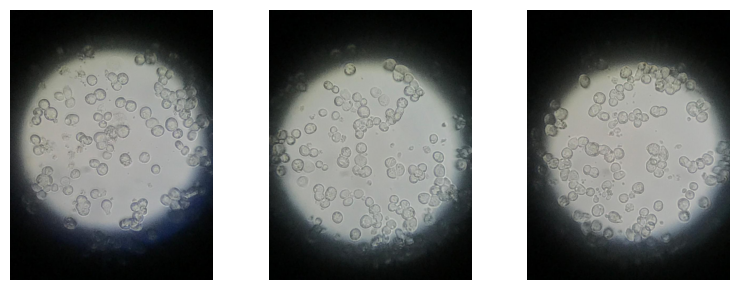

In [10]:
import os
from PIL import Image
import numpy as np

# Specify the folder path, i. e.

#folder_path = "/content/drive/MyDrive/.../Cry1Fa  toxin and protoxin/Cry1Fa Toxin"
#folder_path ="/content/drive/MyDrive/.../Cry1Fa Toxin/72h"
#folder_path ="/content/drive/MyDrive/.../PROTOX Vip3/72h protoxin"
#folder_path ="/content/drive/MyDrive/.../TOXIN Vip3/72 h toxin"

# Initialize an empty list to hold the images
imgs = []
filenames = []

# Loop through all files in the specified folder
for filename in os.listdir(folder_path):
    # Construct full file path
    file_path = os.path.join(folder_path, filename)

    # Check if the file is an image (you can add more extensions if needed)
    if filename.lower().endswith(('.jpg')):
        # Open the image file
        img = Image.open(file_path)
        # Convert the image to a numpy array (optional, if you need numpy arrays)
        img_array = np.array(img)
        # Append the numpy array image to the list
        imgs.append(img_array)
        filenames.append(filename)

# Print out the number of images loaded
print(f'Loaded {len(imgs)} images.')

# Example operation on the first image array
# This will only work if the images have been converted to numpy arrays
print(imgs[0].shape)  # Print the shape of the first image array
plt.figure(figsize=(8,3))
for i, iex in enumerate([2, 5, 8]):
    img = imgs[iex].squeeze()
    plt.subplot(1,3,1+i)
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
from cellpose import io

io.logger_setup() # run this to get printing of progress

# DEFINE CELLPOSE MODEL WITH SIZE
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type="cyto3")
masks_pred, flows, styles, diams = model.eval(imgs, diameter=0, channels=[0,0],
                                              niter=2000) # using more iterations for bacteria


creating new log file


100%|██████████| 25.3M/25.3M [00:00<00:00, 31.2MB/s]
/usr/local/lib/python3.10/dist-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stat

In [8]:
# Plotting the images and their predicted outlines
plt.figure(figsize=(18, 9))
ly = 400
for iex in range(len(imgs)):
    img = imgs[iex].squeeze().copy()
    ax = plt.subplot(3, 8, (iex % 3) * 8 + (iex // 3) + 1)
    ax.imshow(img)

    # GROUND-TRUTH = PURPLE, PREDICTED = YELLOW
    outlines_pred = utils.outlines_list(masks_pred[iex])
    for o in outlines_pred:
        plt.plot(o[:, 0], o[:, 1], color=[1, 1, 0.3], lw=0.75, ls="--")

    plt.axis('off')
    ax.set_title(filenames[iex], fontsize=7)

plt.tight_layout()

# Save the plot as a PNG file in the folder_path
plot_file_path = os.path.join(folder_path, 'predicted_outlines.png')
plt.savefig(plot_file_path)

plt.show()

print(f'Plot saved as {plot_file_path}')
import csv
# Function to calculate the area of each mask
def calculate_mask_areas(mask):
    unique_masks = np.unique(mask)
    unique_masks = unique_masks[unique_masks != 0]  # Exclude background (assuming background is 0)
    areas = [np.sum(mask == m) for m in unique_masks]
    return areas

# Initialize a list to hold the data for the CSV file
csv_data = []

# Calculate the area distribution for each image and collect data
for idx, mask in enumerate(masks_pred):
    areas = calculate_mask_areas(mask)
    for area in areas:
        csv_data.append([filenames[idx], area])

# Define the CSV file path
csv_file = os.path.join(folder_path, 'mask_areas.csv')

# Write the data to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Mask Area'])
    writer.writerows(csv_data)

print(f'CSV file "{csv_file}" has been created with the areas of each mask.')

import pandas as pd
# Load the CSV file using pandas
df = pd.read_csv(csv_file)

# Compute and plot histograms for each image
for filename in df['Filename'].unique():
    img_areas = df[df['Filename'] == filename]['Mask Area']

    # Plotting the area distribution for the current image
   # plt.figure(figsize=(10, 6))
   # plt.hist(img_areas, bins=50, edgecolor='k')
   # plt.title(f'Area Distribution of Masks - {filename}')
   # plt.xlabel('Area')
    #plt.ylabel('Frequency')
    #plt.show()

    # Print the number of masks for the current image
    num_masks = len(img_areas)
    #print(f'Image {filename} has {num_masks} masks.')

# Count the number of ROIs for each image
roi_counts = df['Filename'].value_counts()

# Print the number of ROIs for each image
#print(roi_counts)
# Load the CSV file using pandas
df = pd.read_csv(csv_file)

# Compute the number of ROIs and median area for each image
summary_data = []
for filename in df['Filename'].unique():
    img_areas = df[df['Filename'] == filename]['Mask Area']
    num_rois = len(img_areas)
    median_area = img_areas.median()
    summary_data.append([filename, num_rois, median_area])

# Define the summary CSV file path
summary_csv_file = os.path.join(folder_path, 'summary_report.csv')

# Write the summary data to a new CSV file
with open(summary_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Number of ROIs', 'Median Area'])
    writer.writerows(summary_data)

print(f'Summary CSV file "{summary_csv_file}" has been created with the number of ROIs and median area per image.')

# Print the summary data
for row in summary_data:
    print(f'Image {row[0]} has {row[1]} ROIs with a median area of {row[2]:.2f}.')

Output hidden; open in https://colab.research.google.com to view.

In [9]:
#!pip freeze >> requierements.txt